# Initialization bya BNSE for SM kernel

Comparison between initializing sm kernel with different heuristics

* Random
* Lomb Scargle
* BNSE

In [1]:
# import library if it is not installed
import sys
sys.path.insert(0, '../')

import mogptk as mogp
import numpy as np

%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = mogp.Data()

data.add_function(lambda x: np.sin(6*x), n=100, start=0.0, end=4.0, var=0.03, name='A')
data.remove_range('A', start=2.0, end=None)

In [22]:
model = mogp.SM(data, Q=3)

display(model.get_params())

[{'mixture_weights': -0.02116734911985146,
  'mixture_means': array([0.26285345]),
  'mixture_scales': array([0.23284874])},
 {'mixture_weights': 1.5134173589973445,
  'mixture_means': array([0.57463422]),
  'mixture_scales': array([-0.98187114])},
 {'mixture_weights': 1.6331982146608872,
  'mixture_means': array([0.24786118]),
  'mixture_scales': array([0.60944628])}]

In [24]:
model.init_params(method='BNSE')
display(model.get_params())

[{'mixture_weights': (0.24603662862759626,),
  'mixture_means': (array([0.]),),
  'mixture_scales': (array([63.73802032]),)},
 {'mixture_weights': (0.24603662862759626,),
  'mixture_means': (array([49.705273]),),
  'mixture_scales': (array([0.53806738]),)},
 {'mixture_weights': (0.24603662862759626,),
  'mixture_means': (array([18.63066341]),),
  'mixture_scales': (array([0.7308653]),)}]

In [ ]:
model.data.get_input_dims()

In [ ]:
a = np.random.standard_normal((3, 1))


In [ ]:
 np.array([model.params[q]['mixture_weights'] for q in range(model.Q)])

In [6]:
model.train(maxiter=10)

Building...
Optimizing...
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: -97.436772
  Number of iterations: 10
  Number of functions evaluations: 28
Done


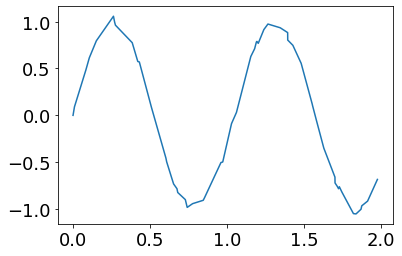

In [7]:
plt.plot(data.X[0], data.Y[0])

In [8]:
x_pred = {0:np.linspace(0, 2, 100)}
x_pred, y_pred, y_var = model.predict(x_pred)

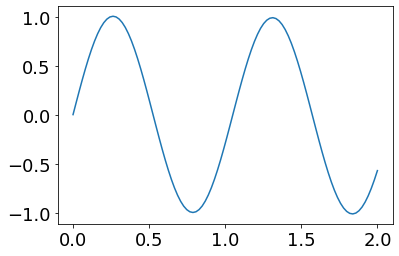

In [9]:
plt.plot(x_pred[0], y_pred[0])

In [ ]:
a

In [ ]:
a